In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set default graph size
plt.rc('figure', figsize=(20.0, 10.0))
sns.set(rc = {'figure.figsize':(20,10)})

In [2]:
df = pd.read_excel('UW_Data.xlsx')
df.head()

,ZCTA,Intake_Rate(2014-16),Intake_Quintile,Intake_Flag/Risk_Quintile,Confirmed_Rate(2014-16),Confirmed_Quintile,Confirmed_Flag/Risk_Quintile,Under18_Population(2016),Under18_Population_MOE,Education(2016),Education_MOE,Poverty(2016),Poverty_MOE
0,78002.0,41.044033,3.0,Medium,8.766687,3.0,Medium,1673.0,495.0,27.162597,5.478911,24.8,9.9
1,78015.0,7.490637,1.0,Low,1.475428,1.0,Low,2937.0,315.0,2.001124,1.197370,1.9,1.5
2,78023.0,10.208778,1.0,Low,0.878624,1.0,Low,7967.0,464.0,5.442213,1.373909,3.2,1.1
3,78069.0,13.576277,1.0,Low,1.607717,1.0,Low,1866.0,522.0,23.582176,4.780033,25.2,9.8
4,78073.0,28.564684,2.0,Med Low,6.019830,2.0,Med Low,2824.0,544.0,36.339371,5.026002,22.8,6.2


In [3]:
# Check for nulls and outliers
df.dropna()

,ZCTA,Intake_Rate(2014-16),Intake_Quintile,Intake_Flag/Risk_Quintile,Confirmed_Rate(2014-16),Confirmed_Quintile,Confirmed_Flag/Risk_Quintile,Under18_Population(2016),Under18_Population_MOE,Education(2016),Education_MOE,Poverty(2016),Poverty_MOE
0,78002.0,41.044033,3.0,Medium,8.766687,3.0,Medium,1673.0,495.0,27.162597,5.478911,24.8,9.9
1,78015.0,7.490637,1.0,Low,1.475428,1.0,Low,2937.0,315.0,2.001124,1.197370,1.9,1.5
2,78023.0,10.208778,1.0,Low,0.878624,1.0,Low,7967.0,464.0,5.442213,1.373909,3.2,1.1
3,78069.0,13.576277,1.0,Low,1.607717,1.0,Low,1866.0,522.0,23.582176,4.780033,25.2,9.8
4,78073.0,28.564684,2.0,Med Low,6.019830,2.0,Med Low,2824.0,544.0,36.339371,5.026002,22.8,6.2
5,78101.0,27.462837,2.0,Med Low,8.818342,3.0,Medium,1323.0,339.0,12.387151,3.991678,8.7,4.3
6,78109.0,37.217938,3.0,Medium,6.740931,3.0,Medium,11670.0,797.0,10.643867,1.610845,11.2,3.1
7,78112.0,40.949713,3.0,Medium,11.071095,4.0,Med High,2499.0,541.0,28.498926,6.302122,16.5,5.6
8,78148.0,36.512619,3.0,Medium,9.898394,3.0,Medium,5085.0,456.0,8.545117,2.890551,8.3,2.6
9,78152.0,16.558675,1.0,Low,5.039597,2.0,Med Low,463.0,125.0,4.372624,2.607524,4.8,2.6


In [4]:
# Verify Data Types are proper
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZCTA                          71 non-null     float64
 1   Intake_Rate(2014-16)          71 non-null     float64
 2   Intake_Quintile               71 non-null     float64
 3   Intake_Flag/Risk_Quintile     71 non-null     object 
 4   Confirmed_Rate(2014-16)       71 non-null     float64
 5   Confirmed_Quintile            71 non-null     float64
 6   Confirmed_Flag/Risk_Quintile  71 non-null     object 
 7   Under18_Population(2016)      71 non-null     float64
 8   Under18_Population_MOE        71 non-null     float64
 9   Education(2016)               71 non-null     float64
 10  Education_MOE                 71 non-null     float64
 11  Poverty(2016)                 71 non-null     float64
 12  Poverty_MOE                   71 non-null     float64
dtypes: floa

### Columns to keep as/change to objects
 - ZTCA
 - Intake_Quintile
 - Intake_Flag/Risk_Quintile
 - Confirmed_Quintile
 - Confirmed_Flag/Risk_Quintile
### Columns to change to integer
 - Intake_Rate(2014-16)
 - Confirmed_Rate(2014-16)
 - Under18_Population(2016)
 - Under18_Population_MOE
 - Education(2016)
 - Education_MOE
 - Poverty(2016)
 - Poverty_MOE
 ------------------------------------------

In [5]:
# Objects
df['ZCTA'] = df['ZCTA'].astype(object)
df['Intake_Quintile'] = df['Intake_Quintile'].astype(object)
df['Intake_Flag/Risk_Quintile'] = df['Intake_Flag/Risk_Quintile'].astype(object)
df['Confirmed_Quintile'] = df['Confirmed_Quintile'].astype(object)
df['Confirmed_Flag/Risk_Quintile'] = df['Confirmed_Flag/Risk_Quintile'].astype(object)

# Integers
df['Intake_Rate(2014-16)'] = df['Intake_Rate(2014-16)'].astype(int)
df['Confirmed_Rate(2014-16)'] = df['Confirmed_Rate(2014-16)'].astype(int)
df['Under18_Population(2016)'] = df['Under18_Population(2016)'].astype(int)
df['Under18_Population_MOE'] = df['Under18_Population_MOE'].astype(int)
df['Education(2016)'] = df['Education(2016)'].astype(int)
df['Education_MOE'] = df['Education_MOE'].astype(int)
df['Poverty(2016)'] = df['Poverty(2016)'].astype(int)
df['Poverty_MOE'] = df['Poverty_MOE'].astype(int)

# Quick confirmation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ZCTA                          71 non-null     object
 1   Intake_Rate(2014-16)          71 non-null     int64 
 2   Intake_Quintile               71 non-null     object
 3   Intake_Flag/Risk_Quintile     71 non-null     object
 4   Confirmed_Rate(2014-16)       71 non-null     int64 
 5   Confirmed_Quintile            71 non-null     object
 6   Confirmed_Flag/Risk_Quintile  71 non-null     object
 7   Under18_Population(2016)      71 non-null     int64 
 8   Under18_Population_MOE        71 non-null     int64 
 9   Education(2016)               71 non-null     int64 
 10  Education_MOE                 71 non-null     int64 
 11  Poverty(2016)                 71 non-null     int64 
 12  Poverty_MOE                   71 non-null     int64 
dtypes: int64(8), object(5)

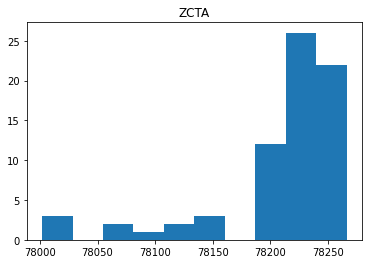

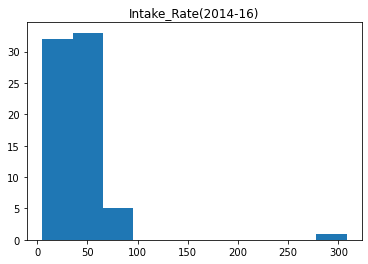

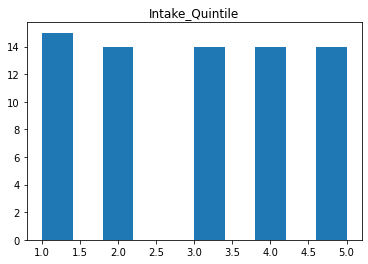

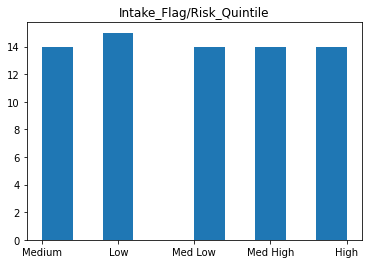

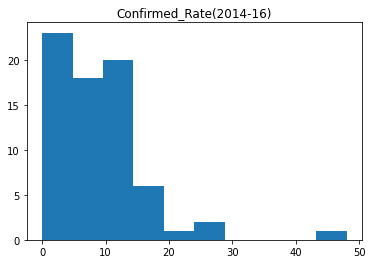

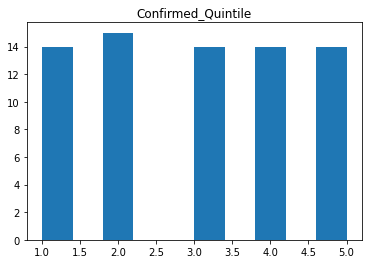

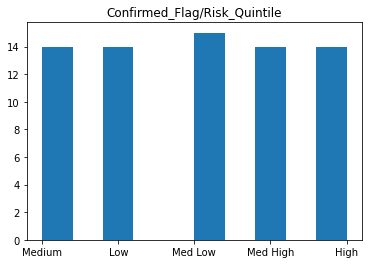

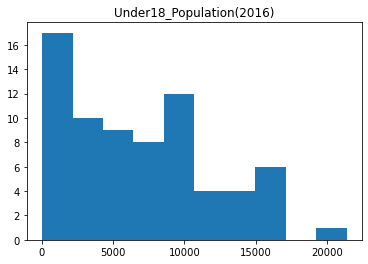

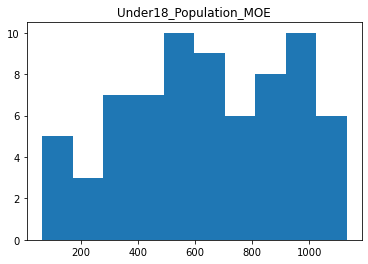

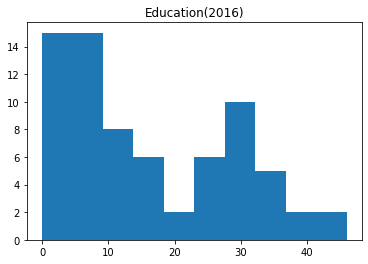

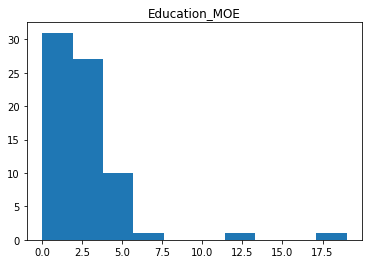

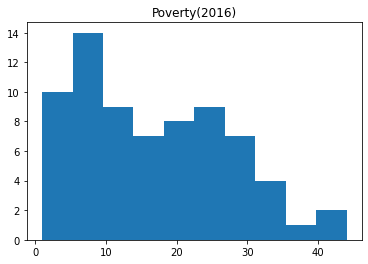

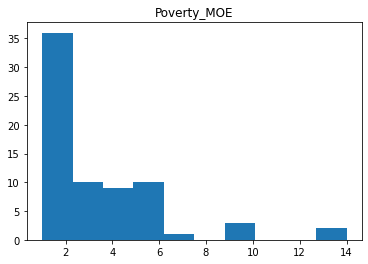

In [6]:
# Univariate distribution among the columns

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

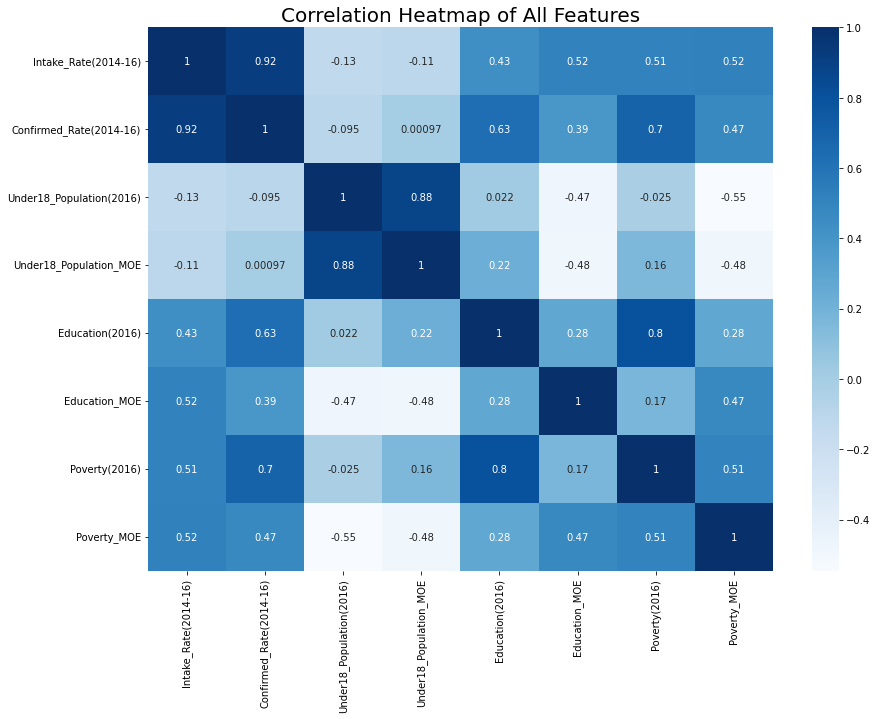

In [7]:
plt.figure(figsize=(14, 10))# set up the figure size. 
sns.heatmap(df.corr(), cmap='Blues', annot=True)# set up the heatmap, including color and annot. 
plt.title('Correlation Heatmap of All Features', fontsize=20) # set upt the title and front size 
plt.show()

[Text(0.5, 1.0, 'The Effects of Poverty Rates on Case Intakes')]

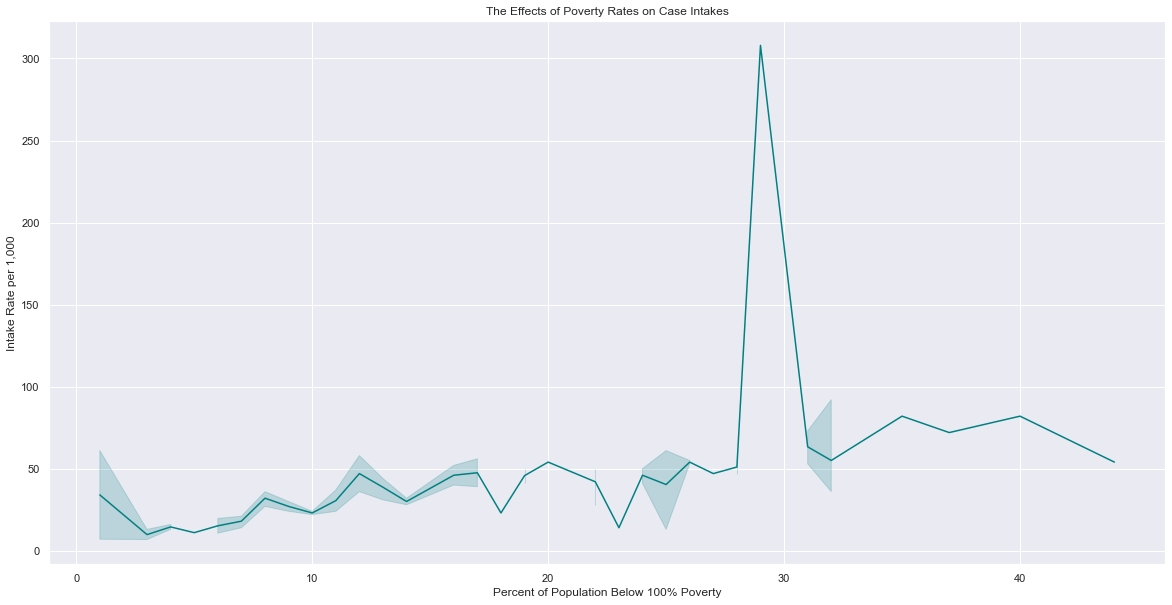

In [12]:
ax = sns.lineplot(x = df['Poverty(2016)'], y = df['Intake_Rate(2014-16)'], color = 'teal')
ax.set(xlabel = 'Percent of Population Below 100% Poverty', ylabel = 'Intake Rate per 1,000')
ax.set(title = 'The Effects of Poverty Rates on Case Intakes')